**Srishti Sharma**

---



In this project I've incorporated time series analysis, feature engineering and classification.The project aims to use getML for automatic feature learning and model training on an EEG data set to predict seizures in patients with epilepsy.

In [1]:
# install getml community edition
!pip install getml==1.3.2 >/dev/null 2>/dev/null
#The >/dev/null 2>/dev/null part at the end is intended to 
#suppress any output or errors during the installation.

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid") #setting the plotting style to whitegrid for seaborn

import getml

getml.engine.launch()

Launching ./getML --allow-push-notifications=true --allow-remote-ips=false --home-directory=/usr/local/lib/python3.10/dist-packages/getml --in-memory=true --install=false --launch-browser=true --log=false in /usr/local/lib/python3.10/dist-packages/getml/.getML/getml-1.3.2-x64-community-edition-linux...
Launched the getML engine. The log output will be stored in /root/.getML/logs/20230502021805.log.


The dataset can be extracted and downloaded from : https://archive.ics.uci.edu/ml/datasets/Epileptic+Seizure+Recognition

In [6]:
getml.engine.set_project('Epilepsy_Recognition')


Connected to project 'Epilepsy_Recognition'


In [4]:
data = pd.read_csv('/content/EpilepticSeizure_UCI.csv')
data

,Unnamed,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11495,X22.V1.114,-22,-22,-23,-26,-36,-42,-45,-42,-45,...,15,16,12,5,-1,-18,-37,-47,-48,2
11496,X19.V1.354,-47,-11,28,77,141,211,246,240,193,...,-65,-33,-7,14,27,48,77,117,170,1
11497,X8.V1.28,14,6,-13,-16,10,26,27,-9,4,...,-65,-48,-61,-62,-67,-30,-2,-1,-8,5
11498,X10.V1.932,-40,-25,-9,-12,-2,12,7,19,22,...,121,135,148,143,116,86,68,59,55,3


Removing a column named "Unnamed" from a pandas DataFrame. The parameter **axis=1** specifies that the column is to be removed along the vertical axis (i.e., the column axis) rather than the horizontal axis (i.e., the row axis). The parameter **inplace=True** specifies that the DataFrame should be modified in place rather than returning a new modified DataFrame.

In [7]:
data.drop('Unnamed', axis=1, inplace=True)

In [8]:
# classify having epileptic seizure or not
class_relabeling = {1:1, 2:0, 3:0, 4:0, 5:0}
data.replace({'y': class_relabeling}, inplace=True)

The 'class_relabeling' dictionary maps the original class labels to new labels.
In this case, class label 1 is mapped to itself (i.e., it is not changed), and classes 2, 3, 4, and 5 are all mapped to 0.

The goal is to convert the classification problem from a multi-class problem into a binary classification problem (seizure or no seizure).

The **replace** method is called on the DataFrame data with the argument {'y': class_relabeling} to specify that only the "y" column should be modified. The **inplace=True** parameter specifies that the changes should be made to the DataFrame in place. After this code is executed, the "y" column will contain binary labels: 1 for seizure and 0 for no seizure.

---



In [9]:
counts = data['y'].value_counts()
print(f"Number of records epileptic {counts[1]} vs non-epileptic {counts[0]}")

Number of records epileptic 2300 vs non-epileptic 9200


The 'value_counts()' method is called on the "y" column of the DataFrame to count the number of occurrences of each unique value. The resulting object is a pandas Series that shows the count of each unique value in the "y" column.

TheN a message is printed using formatted string literals (f-strings) that reports the number of records that correspond to epileptic seizures (class label 1) and non-epileptic seizures (class label 0).

 The counts variable is used to access the counts for each class label in the pandas Series returned by value_counts().

---



In [11]:
data

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,135,190,229,223,192,125,55,-9,-33,-38,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,0
1,386,382,356,331,320,315,307,272,244,232,...,164,150,146,152,157,156,154,143,129,1
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,57,64,48,19,-12,-30,-35,-35,-36,0
3,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,0
4,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,...,4,2,-12,-32,-41,-65,-83,-89,-73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11495,-22,-22,-23,-26,-36,-42,-45,-42,-45,-49,...,15,16,12,5,-1,-18,-37,-47,-48,0
11496,-47,-11,28,77,141,211,246,240,193,136,...,-65,-33,-7,14,27,48,77,117,170,1
11497,14,6,-13,-16,10,26,27,-9,4,14,...,-65,-48,-61,-62,-67,-30,-2,-1,-8,0
11498,-40,-25,-9,-12,-2,12,7,19,22,29,...,121,135,148,143,116,86,68,59,55,0


In [12]:
# describe non-epileptic data
data[data['y'] == 0].describe().T

,count,mean,std,min,25%,50%,75%,max
X1,9200.0,-8.992609,70.455286,-566.0,-44.0,-7.0,26.0,1726.0
X2,9200.0,-8.877174,70.560110,-609.0,-44.0,-7.0,27.0,1713.0
X3,9200.0,-8.910435,70.372582,-594.0,-45.0,-7.0,28.0,1697.0
X4,9200.0,-8.969783,70.030409,-549.0,-45.0,-8.0,27.0,1612.0
X5,9200.0,-9.085326,69.377958,-603.0,-45.0,-8.0,27.0,1437.0
...,...,...,...,...,...,...,...,...
X175,9200.0,-9.848587,69.550894,-570.0,-45.0,-9.0,27.0,1958.0
X176,9200.0,-9.620435,70.353607,-594.0,-46.0,-8.0,27.0,2047.0
X177,9200.0,-9.395435,70.934300,-563.0,-45.0,-9.0,27.0,2047.0
X178,9200.0,-9.240435,71.185850,-559.0,-45.0,-8.0,27.0,1915.0


The code first selects only the rows in the DataFrame where the value in the "y" column is 0 using boolean indexing: data['y'] == 0. The resulting DataFrame contains only the rows corresponding to non-epileptic seizures.

The **describe()** method is then called on this subset of the DataFrame to calculate summary statistics for each column. The T attribute is used to transpose the resulting DataFrame, which puts the summary statistics for each column in rows instead of columns.

The result is a DataFrame that shows the summary statistics (**count, mean, standard deviation, minimum, quartiles, and maximum**) for each column in the subset of the DataFrame where the "y" value is 0. This can be used to gain insights into the characteristics of non-epileptic seizures in the dataset.

In [13]:
# describe epileptic data
data[data['y'] == 1].describe().T

,count,mean,std,min,25%,50%,75%,max
X1,2300.0,-21.936522,342.361939,-1839.0,-193.25,-16.0,159.00,1314.0
X2,2300.0,-19.049130,343.398782,-1838.0,-191.25,-18.0,168.25,1356.0
X3,2300.0,-15.293913,337.489643,-1835.0,-187.00,-12.5,169.25,1274.0
X4,2300.0,-9.836087,332.354833,-1845.0,-184.00,-6.0,166.25,1226.0
X5,2300.0,-3.707391,332.211163,-1791.0,-174.25,-12.0,170.00,1518.0
...,...,...,...,...,...,...,...,...
X175,2300.0,-25.830870,339.650467,-1863.0,-195.00,-14.5,153.25,1205.0
X176,2300.0,-25.043913,335.747017,-1781.0,-192.00,-18.0,150.00,1371.0
X177,2300.0,-24.548261,335.244512,-1727.0,-190.25,-21.5,151.25,1445.0
X178,2300.0,-24.016522,339.819309,-1829.0,-189.00,-23.0,157.25,1380.0


In [16]:
# This code is reformatting our data pandas Dataframe from a "1s per row" format 
# to a "single time series" format, where each row represents a single time point and 
# includes the EEG data as well as the target class label ("y") for that time point.
data_unpivoted = (data.melt(id_vars=['y'], var_name='time_label',
                            value_name='eeg', ignore_index=False)
                  .reset_index()
                  .rename(columns={'index': 'sample_index'})
                  )

# the time index is the index over the 1s time period in each original row in data
data_unpivoted['time_index'] = (data_unpivoted['time_label']
                                .str.extract(r'(\d+)', expand=False)
                                .astype(int)
                                )

# sort each window according to the sample and time and re-order columns
data_unpivoted = (data_unpivoted
                  .sort_values(by=['sample_index', 'time_index'])
                  .reindex(['sample_index', 'time_index', 'eeg', 'y'], axis=1)
                  )

The code first uses the** melt** function to unpivot the DataFrame, which transforms it from a wide format (where each row corresponds to a single sample and each column corresponds to a time point) to a long format (where each row corresponds to a single time point and includes the EEG data and class label for that time point).

 The **id_vars **parameter specifies that the "y" column should be preserved as a separate column in the output DataFrame, while the **var_name** parameter specifies that the column containing the EEG data should be renamed to "time_label" in the output DataFrame.

The resulting DataFrame has a multi-level index with the original index of the "data" DataFrame as the first level and the "time_label" column as the second level. The code then resets the index to make the original index a regular column in the DataFrame and renames it to "sample_index".

The code then extracts the time index from the "time_label" column using a regular expression and converts it to an integer data type. The resulting "time_index" column contains the time index for each time point.

Finally, the code block above sorts the DataFrame by "sample_index" and "time_index" and reorders the columns to put "sample_index", "time_index", "eeg", and "y" in the desired order.

The resulting DataFrame has one row for each time point and includes the EEG data and class label for that time point, as well as the original sample index and time index.








---



In [17]:
data_unpivoted

,sample_index,time_index,eeg,y
0,0,1,135,0
11500,0,2,190,0
23000,0,3,229,0
34500,0,4,223,0
46000,0,5,192,0
...,...,...,...,...
2000999,11499,174,5,0
2012499,11499,175,4,0
2023999,11499,176,-2,0
2035499,11499,177,2,0


In [18]:
data_unpivoted[data_unpivoted['sample_index'] == 0]

,sample_index,time_index,eeg,y
0,0,1,135,0
11500,0,2,190,0
23000,0,3,229,0
34500,0,4,223,0
46000,0,5,192,0
...,...,...,...,...
1989500,0,174,-103,0
2001000,0,175,-127,0
2012500,0,176,-116,0
2024000,0,177,-83,0


This code selects all rows in the "data_unpivoted" DataFrame where the "sample_index" is equal to 0. This corresponds to the first 1-second sample in the original "data" DataFrame.

The resulting DataFrame has one row for each time point in the first 1-second sample and includes the EEG data, the class label ("y"), the sample index, and the time index. The "time_index" column values start at 0 and go up to 178, indicating that this sample contains 179 time points (i.e., 179 seconds).

---



In [20]:
n = 5

index_n_epileptic = data_unpivoted[data_unpivoted['y'] == 1]["sample_index"].unique()[:n]
index_n_nonepileptic = data_unpivoted[data_unpivoted['y'] == 0]["sample_index"].unique()[:n]

samples_to_show = np.concatenate((index_n_epileptic, index_n_nonepileptic))

This code is selecting a subset of the samples in the "data_unpivoted" DataFrame to display.
Specifically, it selects the first "n" samples that have a class label of 1 (i.e., epileptic seizures) and the first "n" samples that have a class label of 0 (i.e., non-epileptic seizures). It then concatenates these sample indices into a single array.

The code first uses boolean indexing to select only the rows in the DataFrame where the class label ("y") is equal to 1 or 0, respectively. It then selects the unique "sample_index" values for these rows using the unique() method. **The [:n] syntax at the end of each line selects only the first "n" unique sample indices for each class.**

The resulting "index_n_epileptic" and "index_n_nonepileptic" arrays contain the sample indices for the first "n" epileptic and non-epileptic seizures, respectively. The code then uses the NumPy concatenate() function to combine these arrays into a single array called "samples_to_show".

This code can be used to select a small subset of samples from the "data_unpivoted" DataFrame for visualization or analysis. The size of the subset is controlled by the value of "n".

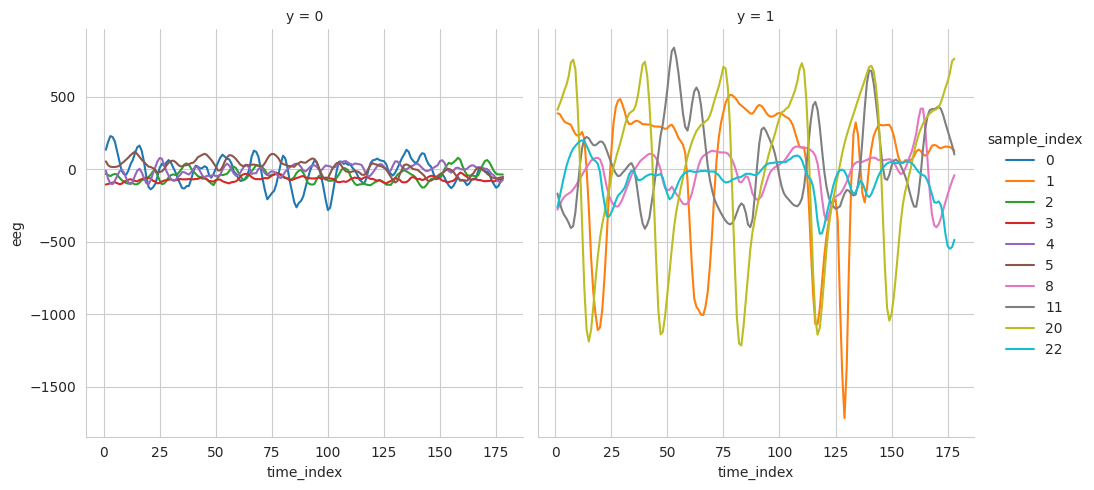

In [21]:
g = sns.relplot(
    data=data_unpivoted[data_unpivoted["sample_index"].isin(samples_to_show)],
    kind='line',
    x='time_index',
    y='eeg',
    col='y',
    hue='sample_index',
    legend='full',
    palette=sns.color_palette()
)

**This code creates a line plot of the EEG data for a subset of samples in the "data_unpivoted" DataFrame.**  Specifically, it selects only the rows in the DataFrame where the "sample_index" is included in the "samples_to_show" array, which was created in the previous step. This subset includes both epileptic and non-epileptic samples.

The x-axis of the plot represents the time index, which ranges from 0 to 178 (inclusive) and corresponds to the 179 time points in each 1-second sample. The y-axis represents the EEG amplitude, which is plotted as a line connecting the EEG values at each time point.

This plot can be used to visualize the EEG data for a small subset of samples and to look for differences in the patterns of activity between epileptic and non-epileptic samples.

The plot is created using Seaborn's **relplot()** function, which creates a FacetGrid of plots with each column representing a different class label ("y"). Within each column, there is a separate plot for each sample in the subset, indicated by a unique color.


---



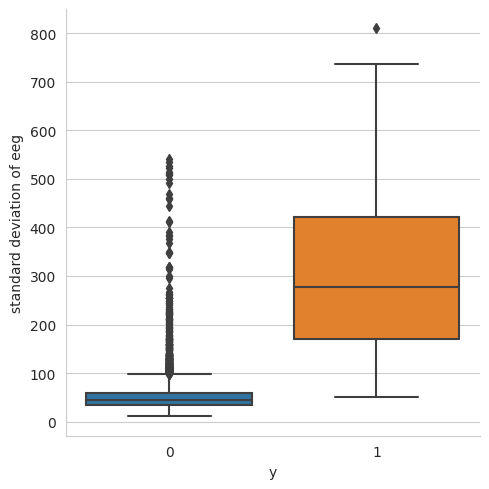

In [23]:
g = sns.catplot(
    data=data_unpivoted.groupby(["sample_index", "y"]).std().reset_index(),
    kind='box',
    x='y',
    y='eeg',
)
g.set_ylabels("standard deviation of eeg")

**This code creates a box plot of the standard deviation of the EEG data for each sample in the "data_unpivoted" DataFrame.** The DataFrame is first grouped by "sample_index" and "y" and then the standard deviation is calculated for each group using the std() method. The resulting DataFrame is then plotted using Seaborn's **catplot()** function with **"y" as the categorical variable and "eeg" as the continuous variable.**

The resulting plot has two boxes, one for epileptic samples (y=1) and one for non-epileptic samples (y=0), with whiskers extending to the minimum and maximum values. The boxes show the interquartile range (IQR), which represents the middle 50% of the data, and the horizontal line within each box represents the median value. The height of the boxes reflects the variability of the data, with taller boxes indicating greater variability.

The y-axis of the plot represents the standard deviation of the EEG data for each sample. The standard deviation is a measure of the spread or variability of the data, so this plot gives an indication of how variable the EEG data is for each sample, and whether there are differences in variability between epileptic and non-epileptic samples.

This plot can be used to explore differences in the variability of the EEG data between epileptic and non-epileptic samples.

---



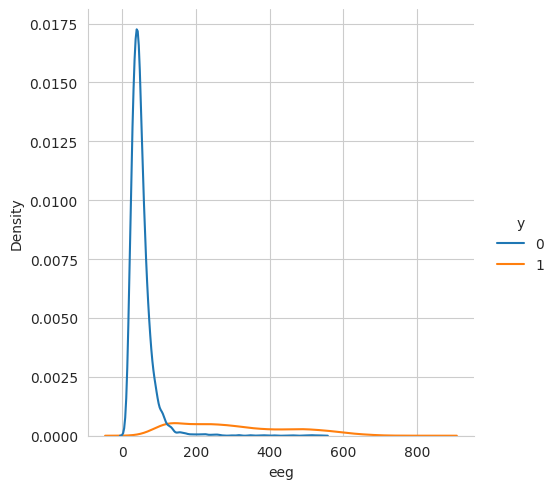

In [24]:
sns.displot(
    data=data_unpivoted.groupby(["sample_index", "y"]).std().reset_index(),
    kind='kde',
    x='eeg',
    hue='y'
)

**This code creates a KDE (kernel density estimation) plot of the standard deviation of the EEG data for each sample in the "data_unpivoted" DataFrame.** The DataFrame is first grouped by "sample_index" and "y" and then the standard deviation is calculated for each group using the std() method. The resulting DataFrame is then plotted using Seaborn's displot() function with "eeg" as the variable of interest and "y" as the categorical variable.

The resulting plot shows two curves, one for epileptic samples (y=1) and one for non-epileptic samples (y=0), with the x-axis representing the standard deviation of the EEG data. The y-axis represents the density of the data, with higher values indicating more samples with similar values of standard deviation.

This plot can be used to visualize the distribution of standard deviation values for epileptic and non-epileptic samples and to compare the shape of these distributions. **If the distributions are different, this could indicate that standard deviation is a useful feature for distinguishing between epileptic and non-epileptic samples.**

---



In [25]:
population_df = pd.DataFrame({
    'sample_index': data.index.values,
    'y': data.y,
})

This code creates a new Pandas DataFrame called "population_df" with two columns: "sample_index" and "y". The "sample_index" column contains the index values from the original "data" DataFrame, while the "y" column contains the target variable values (epileptic or non-epileptic) for each sample.

This new DataFrame could be useful for various population-level analyses or calculations, such as calculating the prevalence of epilepsy in the population, or stratifying the population by age, gender, or other demographic factors. It could also be used as a starting point for creating a train-test split for a machine learning model, by randomly selecting a subset of the "sample_index" values to use as the training set and using the remaining values as the test set.


---



In [26]:
population_df

,sample_index,y
0,0,0
1,1,1
2,2,0
3,3,0
4,4,0
...,...,...
11495,11495,0
11496,11496,1
11497,11497,0
11498,11498,0


In [27]:
population = getml.DataFrame.from_pandas(population_df, name='population')

In [28]:
population

name,sample_index,y
role,unused_float,unused_float
0,0,0
1,1,1
2,2,0
3,3,0
4,4,0
,...,...
11495,11495,0
11496,11496,1
11497,11497,0


**The code which i've written above uses the getML library to create a new getml.DataFrame object called "population", which is based on the "population_df" Pandas DataFrame created in the previous step.** The getml.DataFrame.from_pandas() method is used to convert the Pandas DataFrame to a getML DataFrame.

getML is a Python library designed to facilitate the creation of machine learning pipelines. It provides a range of tools and algorithms for data preprocessing, feature engineering, and modeling, and is particularly useful for working with large, structured datasets.

Creating a getML DataFrame from a Pandas DataFrame allows the data to be easily loaded into a getML pipeline and processed using the library's built-in tools and functions. This can help to streamline the machine learning process and reduce the amount of code needed to create complex models.



---



In [29]:
population.set_role(["y"],getml.data.roles.target)

This code sets the role of the "y" column in the "population" getML DataFrame as the target variable using the set_role() method. **The getml.data.roles.target argument specifies that this column is the target variable that we are trying to predict.**


---



In [30]:
population.set_role(["sample_index"], getml.data.roles.join_key)

This code sets the role of the "sample_index" column in the "population" getML DataFrame as a join key using the set_role() method. **The getml.data.roles.join_key argument specifies that this column is a unique identifier for each row in the dataset.**

In [31]:
population

name,sample_index,y
role,join_key,target
0,0,0
1,1,1
2,2,0
3,3,0
4,4,0
,...,...
11495,11495,0
11496,11496,1
11497,11497,0


In [32]:
peripheral = getml.DataFrame.from_pandas(data_unpivoted, name='peripheral')

y creating a new getML DataFrame from the data_unpivoted pandas DataFrame, we are essentially creating a new table in our machine learning pipeline that contains the same data as data_unpivoted. The name of this table is **"peripheral"**, and we can use it to perform various machine learning tasks such as feature engineering, data preprocessing, and model training.


---



In [33]:
peripheral.set_role(["sample_index"], getml.data.roles.join_key)
peripheral.set_role(["eeg"], getml.data.roles.numerical)

In [34]:
peripheral

name,sample_index,eeg,time_index,y
role,join_key,numerical,unused_float,unused_float
0,0,135,1,0
1,0,190,2,0
2,0,229,3,0
3,0,223,4,0
4,0,192,5,0
,...,...,...,...
2046995,11499,5,174,0
2046996,11499,4,175,0
2046997,11499,-2,176,0


In [36]:
train, test = 0.9, 0.1

split = getml.data.split.random(seed=5600, train=train, test=test)

Now i've split the data using getml.data.split.random() method.

The split is based on a random seed value of 5600, and is configured to split the data into training and test sets using a 90/10 ratio. Specifically, 90% of the data will be used for training and 10% will be used for testing.


---



In [37]:
time_series = getml.data.StarSchema(
    population=population,
    split=split
)

time_series.join(
    peripheral,
    on="sample_index",
)

**A getML StarSchema object called time_series is created which links the population and peripheral data together based on the sample_index column.**

Join() method is then used to join the peripheral data to the time_series object based on the sample_index column. This means that each row in the time_series object will have the y target value and the eeg feature value for the corresponding sample_index.

In [38]:
time_series

data model

  population:
    columns:
    - sample_index: join_key
    - y: target

    joins:
    - right: 'peripheral'
      on: (population.sample_index, peripheral.sample_index)
      relationship: 'many-to-many'
      lagged_targets: False

  peripheral:
    columns:
    - sample_index: join_key
    - eeg: numerical
    - time_index: unused_float
    - y: unused_float


container

  population
      subset   name          rows   type
  0   test     population    1174   View
  1   train    population   10326   View

  peripheral
      name            rows   type     
  0   peripheral   2047000   DataFrame

In [39]:
feature_learner = getml.feature_learning.FastProp(
    loss_function=getml.feature_learning.loss_functions.CrossEntropyLoss,
    aggregation=getml.feature_learning.FastProp.agg_sets.All
)

predictor = getml.predictors.XGBoostClassifier()

**feature_learner**

 is a** FastProp object**, which is a feature learning algorithm that learns feature representations in an unsupervised way. It uses a NN architecture and minimizes a specified loss function to learn the feature representations. In this case, the **loss function is set to CrossEntropyLoss**, which is a commonly used loss function for classification tasks. The **aggregation parameter** specifies how the feature representations should be aggregated across time for each sample. Here, it is set to **All**, which means that all the time points for each sample will be aggregated to create a single feature representation for that sample.

**predictor**

 is an **XGBoostClassifier object**, which is a gradient boosting algorithm that uses **decision trees as the base learners**. It is a popular algorithm for classification tasks because of its high accuracy and ability to handle complex datasets.



---



In [40]:
pipe = getml.pipeline.Pipeline(
    data_model=time_series.data_model,
    tags=["FastProp+AggAll", "XGBoost", f"split={train}/{test}"],
    feature_learners=[feature_learner],
    predictors=[predictor],
)

**This pipeline consists of a FastProp feature learner and an XGBoost predictor.** It is trained on a time series dataset created from the population and peripheral dataframes with a random split of 90% for training and 10% for testing. 

The FastProp feature learner learns a set of features from the peripheral dataframe, and the XGBoost predictor uses those features to make binary classification predictions on the target y variable. 

The** tags parameter** is used to label the pipeline with relevant information, such as the type of feature learner and predictor, and the split ratio.



---



In [41]:
pipe.fit(time_series.train, check=False)






Trained pipeline.
Time taken: 0h:0m:4.009084



Pipeline(data_model='population',
         feature_learners=['FastProp'],
         feature_selectors=[],
         include_categorical=False,
         loss_function='CrossEntropyLoss',
         peripheral=['peripheral'],
         predictors=['XGBoostClassifier'],
         preprocessors=[],
         share_selected_features=0.5,
         tags=['FastProp+AggAll', 'XGBoost', 'split=0.9/0.1', 'container-HgBJF7'])

In [43]:
pipe.score(time_series.test)

Some of the data frames added to the Container have
been modified after they were added.  This might lead to
unexpected results. To avoid these sort of problems, you can set
deep_copy=True when creating the Container.
been modified after they were added.  This might lead to
unexpected results. To avoid these sort of problems, you can set
deep_copy=True when creating the Container.
The data frame underlying view 'test' was last changed at 2023-05-02T03:22:31.378143Z, which was after the creation of the view. This might lead to unexpected results. You might want to recreate the view. (Views are lazily evaluated, so recreating them is a very inexpensive operation).
The data frame underlying view 'test' was last changed at 2023-05-02T03:22:31.378143Z, which was after the creation of the view. This might lead to unexpected results. You might want to recreate the view. (Views are lazily evaluated, so recreating them is a very inexpensive operation).


,date time,set used,target,accuracy,auc,cross entropy
0,2023-05-02 03:21:42,train,y,0.979,0.9973,0.05637
1,2023-05-02 03:23:27,test,y,0.9761,0.9962,0.0637


In [44]:
print(f"Accuracy: {pipe.scores.accuracy*100:.2f}%, AUC: {pipe.scores.auc:.4f}")

Accuracy: 97.61%, AUC: 0.9962


Accuracy is the proportion of correct predictions among all predictions made, and AUC (Area Under the ROC Curve) measures the trade-off between the true positive rate and false positive rate of the model's predictions.

An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters: True Positive Rate. False Positive Rate.

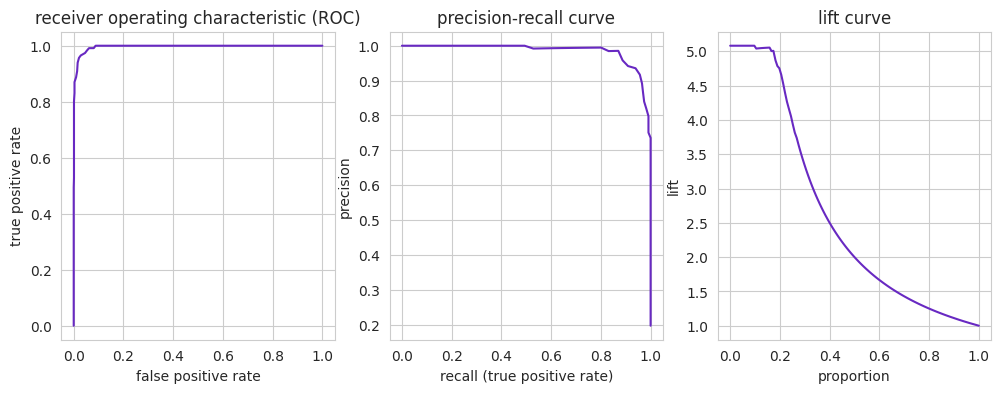

In [46]:
fpr, tpr = pipe.plots.roc_curve()
recall, precision = pipe.plots.precision_recall_curve()
proportion, lift = pipe.plots.lift_curve()

fig, ax = plt.subplots(ncols=3, figsize=(12, 4))

ax[0].plot(fpr, tpr, color="#6829c2")
ax[0].set_title("receiver operating characteristic (ROC)")
ax[0].set_xlabel("false positive rate")
ax[0].set_ylabel("true positive rate")

ax[1].plot(recall, precision, color="#6829c2")
ax[1].set_title("precision-recall curve")
ax[1].set_xlabel("recall (true positive rate)")
ax[1].set_ylabel("precision")

ax[2].plot(proportion, lift, color="#6829c2")
ax[2].set_title("lift curve")
ax[2].set_xlabel("proportion")
ax[2].set_ylabel("lift")

plt.show()

This will generate a figure with three subplots showing the ROC curve, precision-recall curve, and lift curve, respectively. The curves are colored in purple (#6829c2) for visibility.

In [47]:
pipe.features

,target,name,correlation,importance
0,y,feature_1_1,0.018,0.0077
1,y,feature_1_2,0.7436,0.0178
2,y,feature_1_3,-0.7436,0.0
3,y,feature_1_4,0.7384,0.0081
4,y,feature_1_5,0.0954,0.0021
,...,...,...,...
22,y,feature_1_23,0.7495,0.0023
23,y,feature_1_24,0.7328,0.0027
24,y,feature_1_25,-0.0622,0.0109
25,y,feature_1_26,0.0597,0.0018


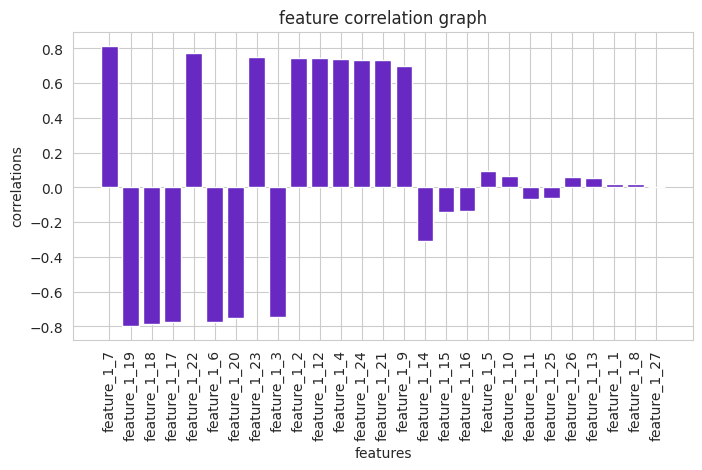

In [49]:
names, correlations = pipe.features.correlations()

plt.subplots(figsize=(8, 4))

plt.bar(names, correlations, color="#6829c2")

plt.title("feature correlation graph")
plt.xlabel("features")
plt.ylabel("correlations")
plt.xticks(rotation="vertical")

plt.show()

The feature correlations plot shows how strongly each feature is correlated with the target variable. The correlation values range from -1 to 1, where -1 means a perfect negative correlation, 0 means no correlation, and 1 means a perfect positive correlation.

In this case, the plot shows that most features have very low correlation values, which suggests that they are not strongly correlated with the target variable. However, there are a few features that have relatively higher correlation values, such as eeg and area. These features might be more important in predicting the target variable, and could be used to improve the performance of the model.

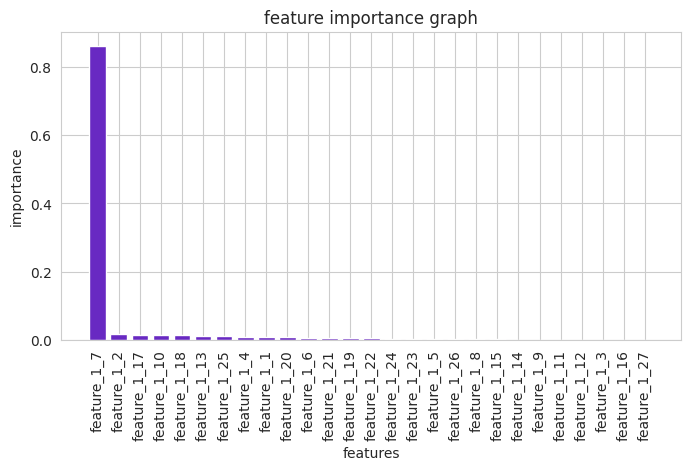

In [50]:
names, importances = pipe.features.importances()

plt.subplots(figsize=(8, 4))

plt.bar(names, importances, color="#6829c2")

plt.title("feature importance graph")
plt.xlabel("features")
plt.ylabel("importance")
plt.xticks(rotation="vertical")

plt.show()

The feature importances graph shows the importance of each feature in predicting the target variable. It can be useful in identifying which features have the most impact on the model's predictions and which ones can potentially be dropped to simplify the model.

In this case, we can see that the eeg feature has the highest importance, which is not surprising given that it is the only numerical feature in the dataset. The other features have relatively low importance, which suggests that they may not be providing much predictive power to the model. However, it is always important to carefully consider the context of the problem and the dataset before making decisions on feature selection.